# ZERO DAY ATTACK DETECTION FOR CYBER ATTACKS 
<img src="https://th.bing.com/th/id/OIP.-Eezt4UpIDRHVUhTTX3iQQHaDZ?pid=ImgDet&w=1745&h=800&rs=1" width=1000 height=500>



<h1>Importing Libraries:</br></h1> <h3>The code starts by importing various libraries including psutil, tkinter, numpy, pandas, warnings, matplotlib, seaborn, tensorflow, xgboost, scapy, and others.</br> These libraries are used for data manipulation, visualization, machine learning, and network packet analysis.</h3>


In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Read Train and Test dataset
data_train =pd.read_csv('KDDTrain+.txt')

In [3]:
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [5]:
# Assign name for columns
data_train.columns = columns
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [7]:
data_train.describe().style.background_gradient(cmap='Greens').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480802,4021285.112110,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [8]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [9]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

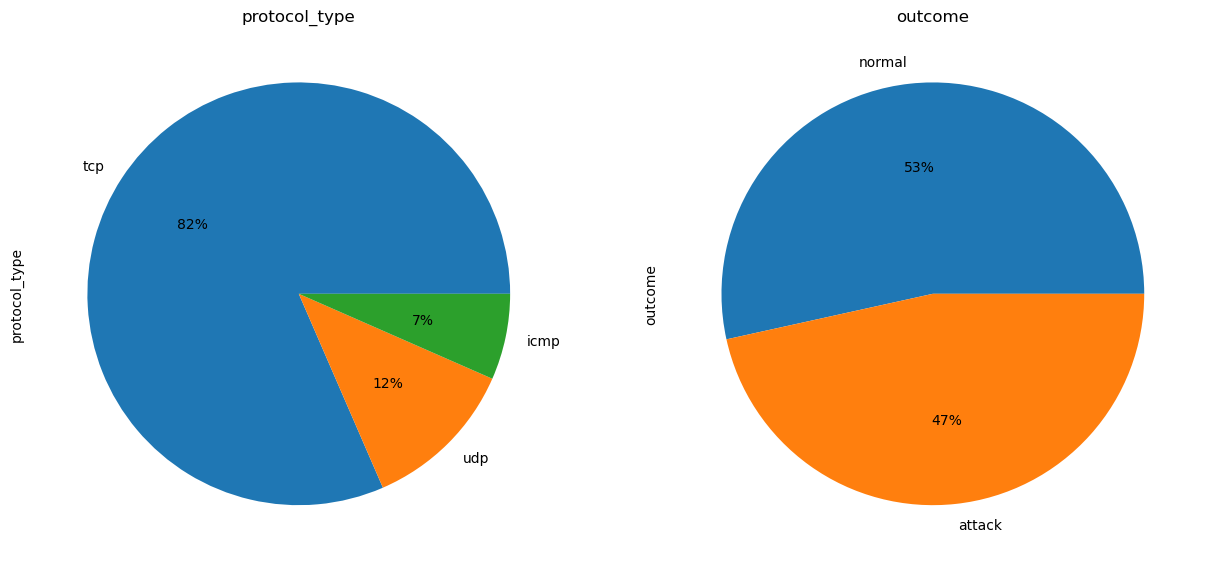

In [10]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)

In [11]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,attack,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,attack,21


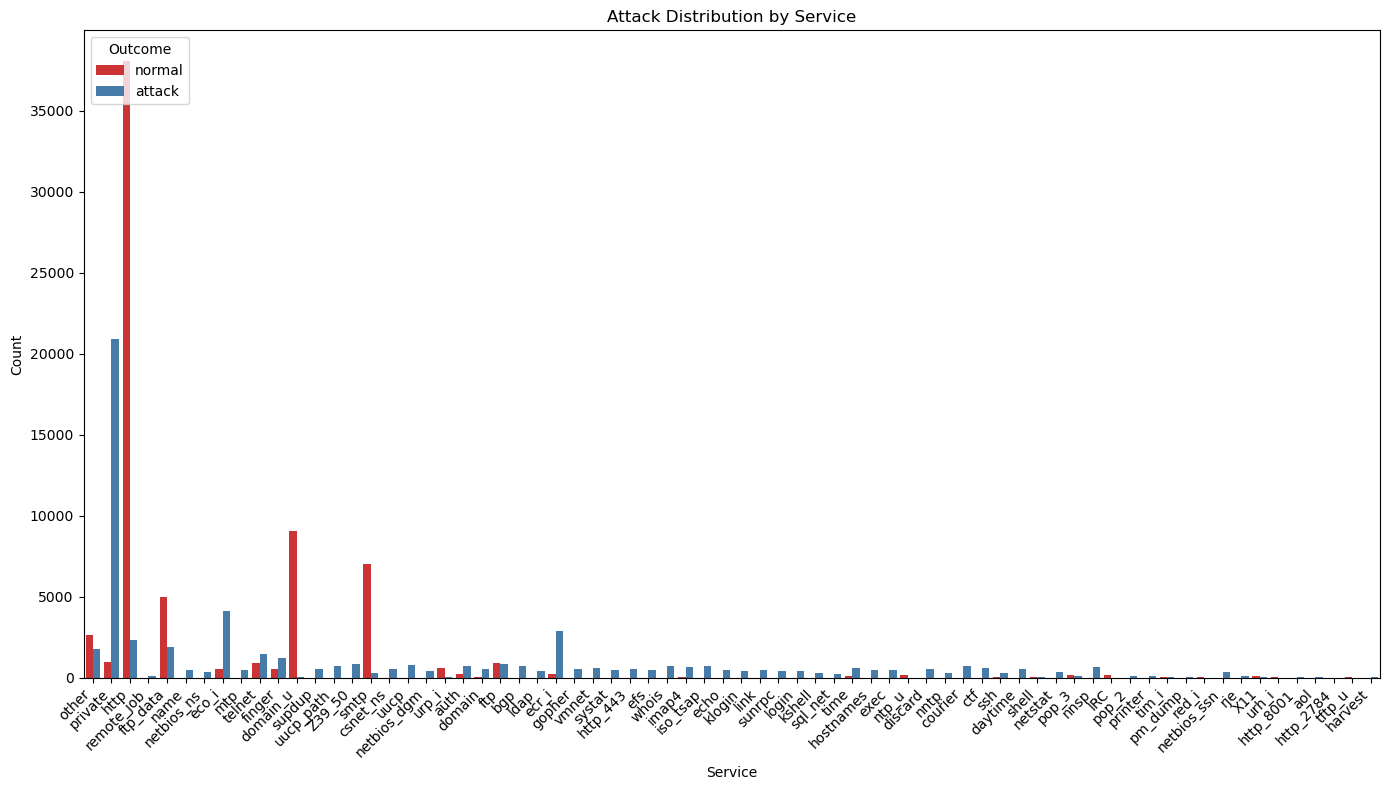

Done


In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(data=data_train, x='service', hue='outcome', palette='Set1')
plt.title("Attack Distribution by Service")
plt.xlabel("Service")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()
print("Done")

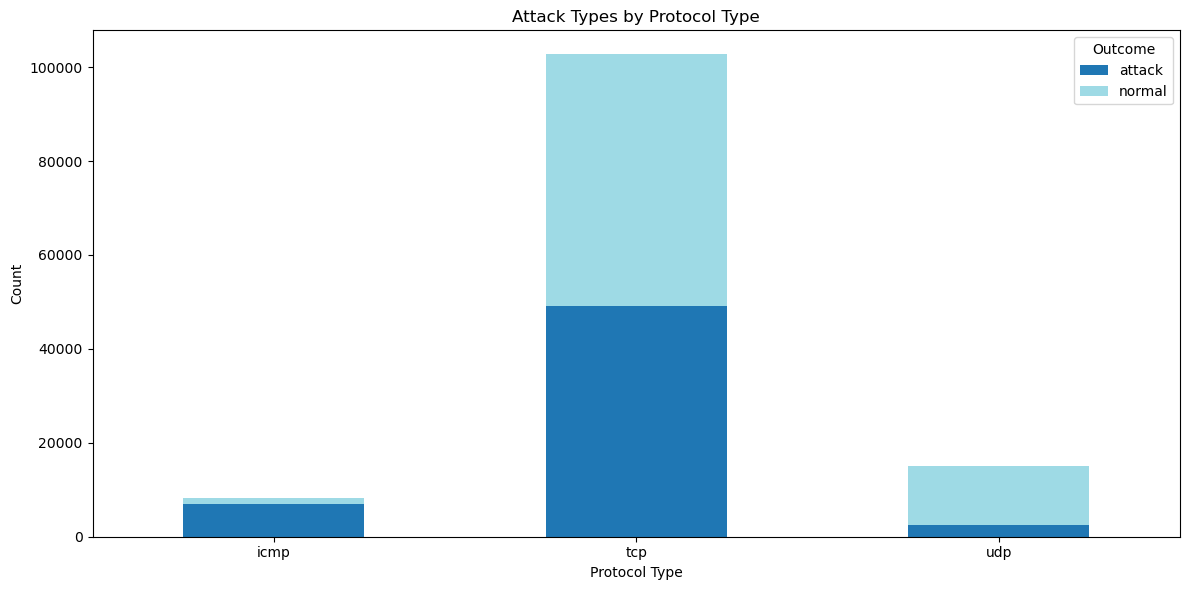

In [13]:
attack_by_protocol = data_train.groupby(['protocol_type', 'outcome']).size().unstack()
attack_by_protocol.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Attack Types by Protocol Type")
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


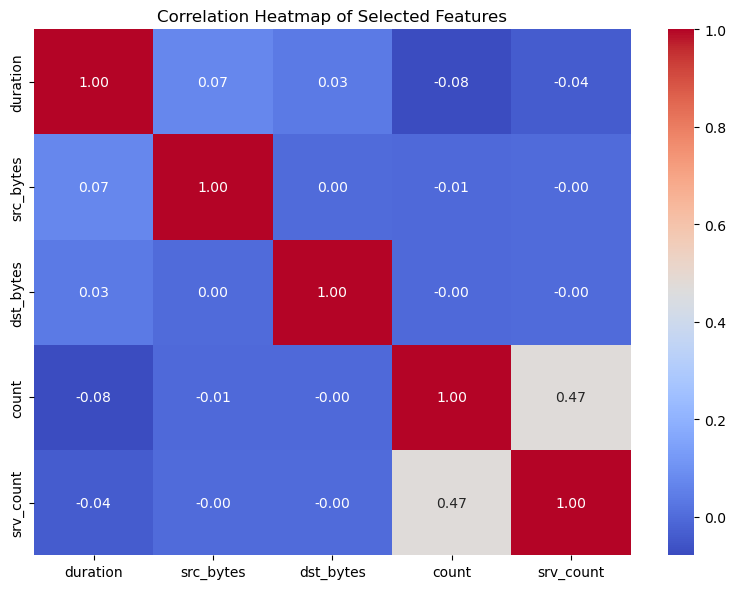

In [14]:
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count']
selected_corr = data_train[selected_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap of Selected Features")
plt.tight_layout()
plt.show()



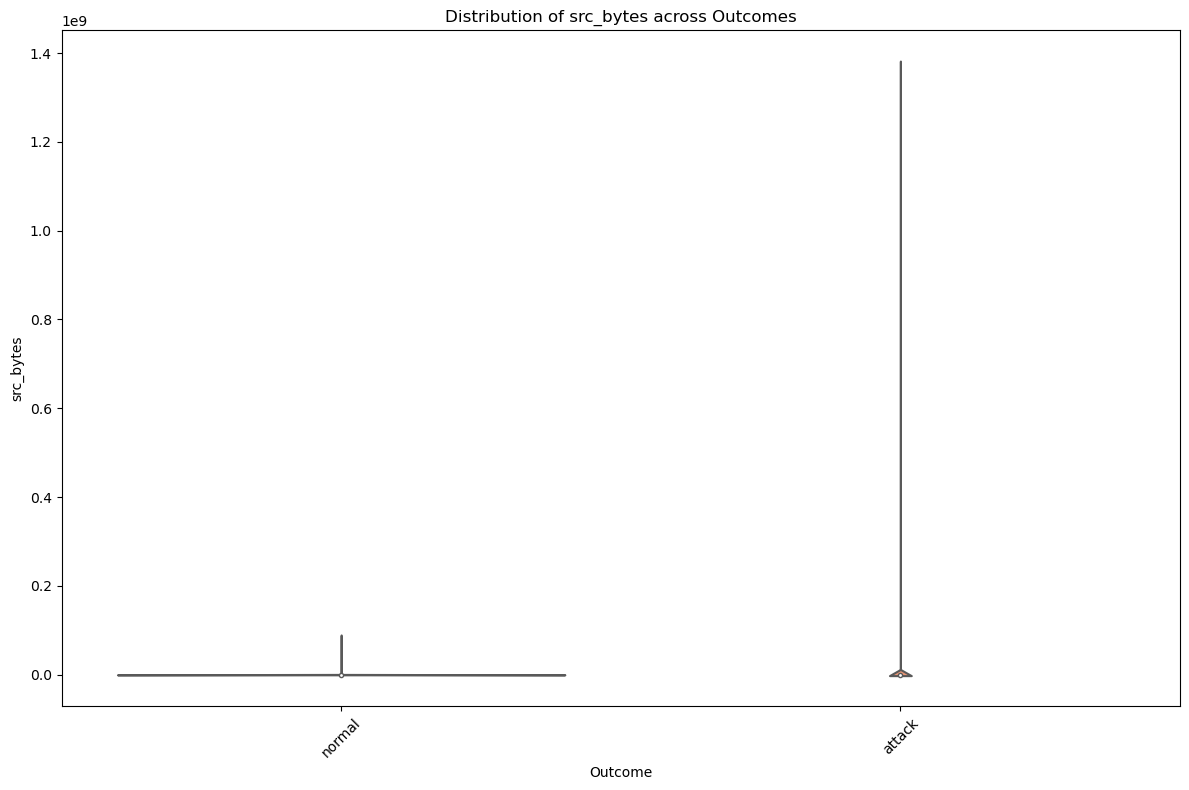

In [15]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data_train, x='outcome', y='src_bytes', palette='Set2')
plt.title("Distribution of src_bytes across Outcomes")
plt.xlabel("Outcome")
plt.ylabel("src_bytes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


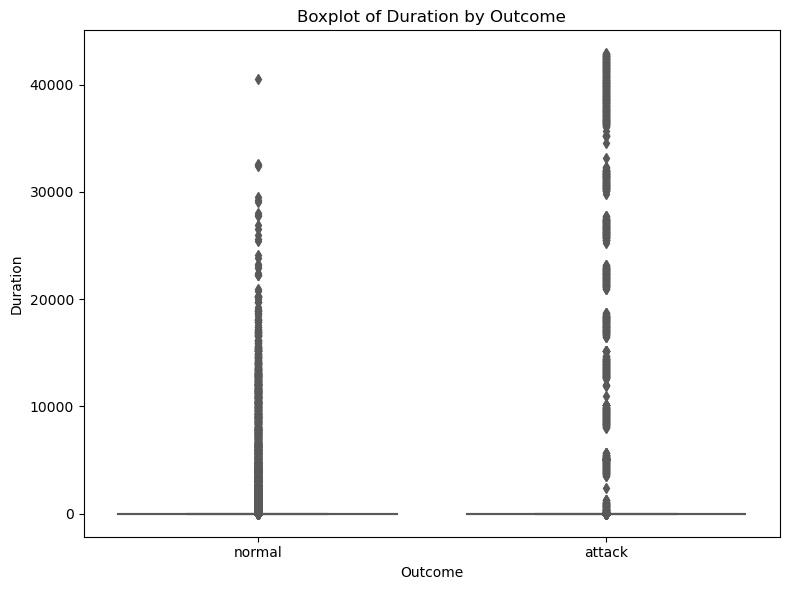

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_train, x='outcome', y='duration', palette='Set2')
plt.title("Boxplot of Duration by Outcome")
plt.xlabel("Outcome")
plt.ylabel("Duration")
plt.tight_layout()
plt.show()



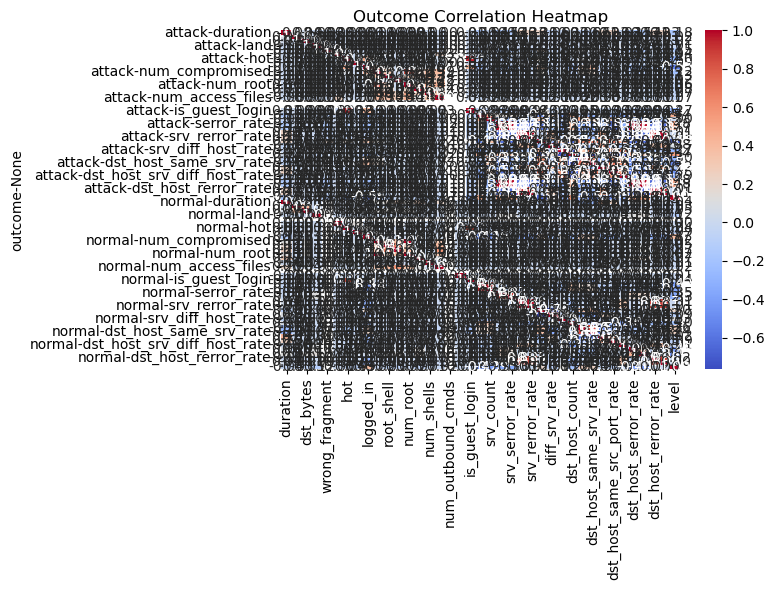

In [17]:
outcome_corr = data_train.groupby('outcome').corr()
# Adjust heatmap size and font size
plt.figure(figsize=(8, 6))
sns.heatmap(outcome_corr, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Outcome Correlation Heatmap")
plt.tight_layout()
plt.show()


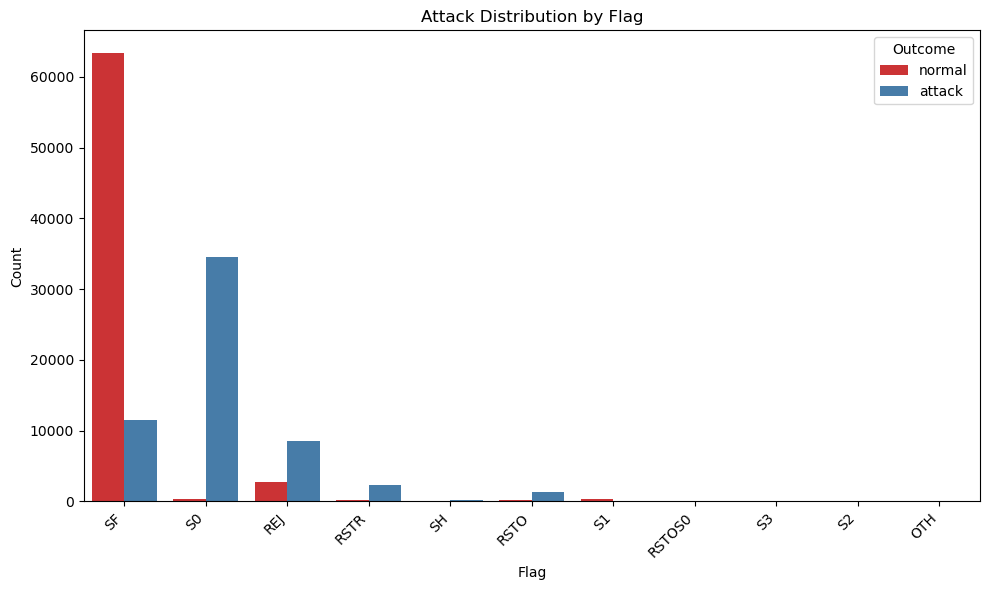

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_train, x='flag', hue='outcome', palette='Set1')
plt.title("Attack Distribution by Flag")
plt.xlabel("Flag")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


# SCALING UP THE DATA

In [19]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

<h1>Preprocessing Data</b>:</h1></br> <h3>The script reads data from a CSV file ('KDDTrain+.txt') and performs data preprocessing tasks. </br>
    It scales numerical features, encodes categorical variables, and prepares the dataset for training machine learning models.</h3> 
  <img src="https://dzone.com/storage/temp/10582271-infrrd-info-768x721.jpg">

In [20]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [21]:
scaled_train = preprocess(data_train)


In [22]:
column_names_list = scaled_train.columns.tolist()
print("Column names as a list:", column_names_list)
scaled_train.info()

Column names as a list: ['land', 'logged_in', 'is_host_login', 'is_guest_login', 'outcome', 'level', 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_doma

<h1>PCA Reduction:</h1></br></br> <h3>The code implements a PCA that compresses and reconstructs the input data.</br> PCA is then used to transform the input data. The Reduced train data is used for anomaly detection.</h3>
<img src = https://hands-on.cloud/wp-content/uploads/2022/02/Implementing-Principal-component-analysis-PCA-using-Python.png width = "600"/>

In [23]:
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values

y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=30)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.3, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 122 and of reduced features is 30


<h1>Model Training and Evaluation:</h1> </br><h3>The code trains several machine learning models including Logistic Regression, Decision Tree, and XGBoost, using the encoded features obtained from a trained autoencoder. It evaluates the models using accuracy, precision, recall, and F1-score metrics on training and test datasets.</h3>
<img src="https://www.harishgade.com/wp-content/uploads/2019/09/Machine-Learning-Model-Without-Labeled-Data.png">


In [24]:
kernal_evals = dict()
from sklearn.metrics import ConfusionMatrixDisplay
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]
    
    print("Training Accuracy " + str(name) + ": {:.2f}%".format(train_accuracy*100))
    print("Test Accuracy " + str(name) + ": {:.2f}%".format(test_accuracy*100))
    print("Training Precision " + str(name) + ": {:.2f}%".format(train_precision*100))
    print("Test Precision " + str(name) + ": {:.2f}%".format(test_precision*100))
    print("Training Recall " + str(name) + ": {:.2f}%".format(train_recall*100))
    print("Test Recall " + str(name) + ": {:.2f}%".format(test_recall*100))
    print("Training F1-Score " + str(name) + ": {:.2f}%".format(train_f1*100))
    print("Test F1-Score " + str(name) + ": {:.2f}%".format(test_f1*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['normal', 'attack'])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    ax1.grid(False)
    cm_display.plot(ax=ax1, values_format='d')  # Display individual values of confusion matrix
    ax1.set_title("Confusion Matrix for " + str(name))
    
    metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    train_metrics = [train_accuracy, train_precision, train_recall, train_f1]
    test_metrics = [test_accuracy, test_precision, test_recall, test_f1]
    
    x = np.arange(len(metrics_names))
    width = 0.35
    
    ax2.bar(x - width/2, train_metrics, width, label='Train')
    ax2.bar(x + width/2, test_metrics, width, label='Test')
    
    ax2.set_ylabel('Scores')
    ax2.set_title('Metrics Comparison for ' + str(name))
    ax2.set_xticks(x)
    ax2.set_xticklabels(metrics_names)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()



# TRAINING AND PREDICTION ON PCA REDUCED 30 FEATURES

#

# LOGISTIC REGRESSION
<img src="https://th.bing.com/th/id/R.3e80078502bd23a659ca1ff4d7876cce?rik=g5JFf8Vzf7f%2fjw&pid=ImgRaw&r=0" width=500, height=500>

Training Accuracy Logistic Regression: 90.50%
Test Accuracy Logistic Regression: 90.34%
Training Precision Logistic Regression: 90.30%
Test Precision Logistic Regression: 90.37%
Training Recall Logistic Regression: 89.07%
Test Recall Logistic Regression: 88.95%
Training F1-Score Logistic Regression: 89.68%
Test F1-Score Logistic Regression: 89.65%


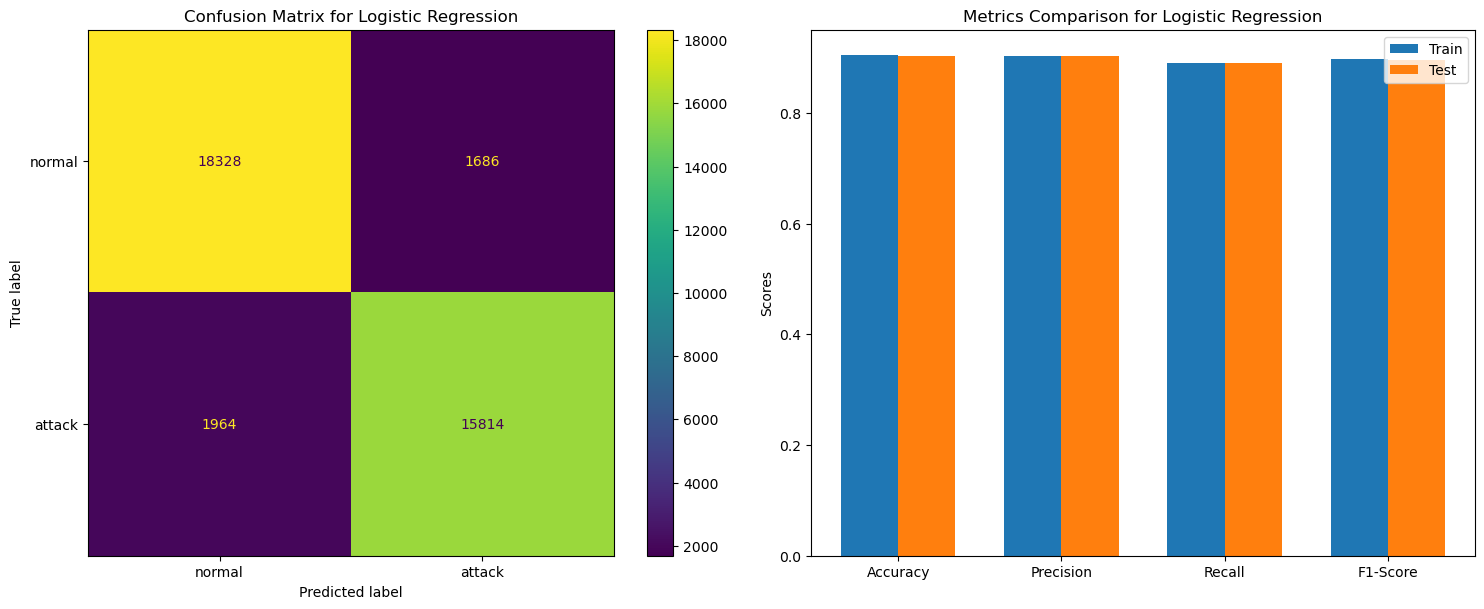

In [25]:
lr = LogisticRegression().fit(x_train_reduced, y_train_reduced)
evaluate_classification(lr, "Logistic Regression", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# 

# XGB CLASSIFIER
<img src="https://th.bing.com/th/id/R.b8630edc224d36b0f5c8f95dc40814ef?rik=o9QhyoWsphclNQ&pid=ImgRaw&r=0&sres=1&sresct=1" width=500 hieght=500>

Training Accuracy XGBoost: 99.99%
Test Accuracy XGBoost: 99.89%
Training Precision XGBoost: 100.00%
Test Precision XGBoost: 99.93%
Training Recall XGBoost: 99.99%
Test Recall XGBoost: 99.84%
Training F1-Score XGBoost: 99.99%
Test F1-Score XGBoost: 99.88%


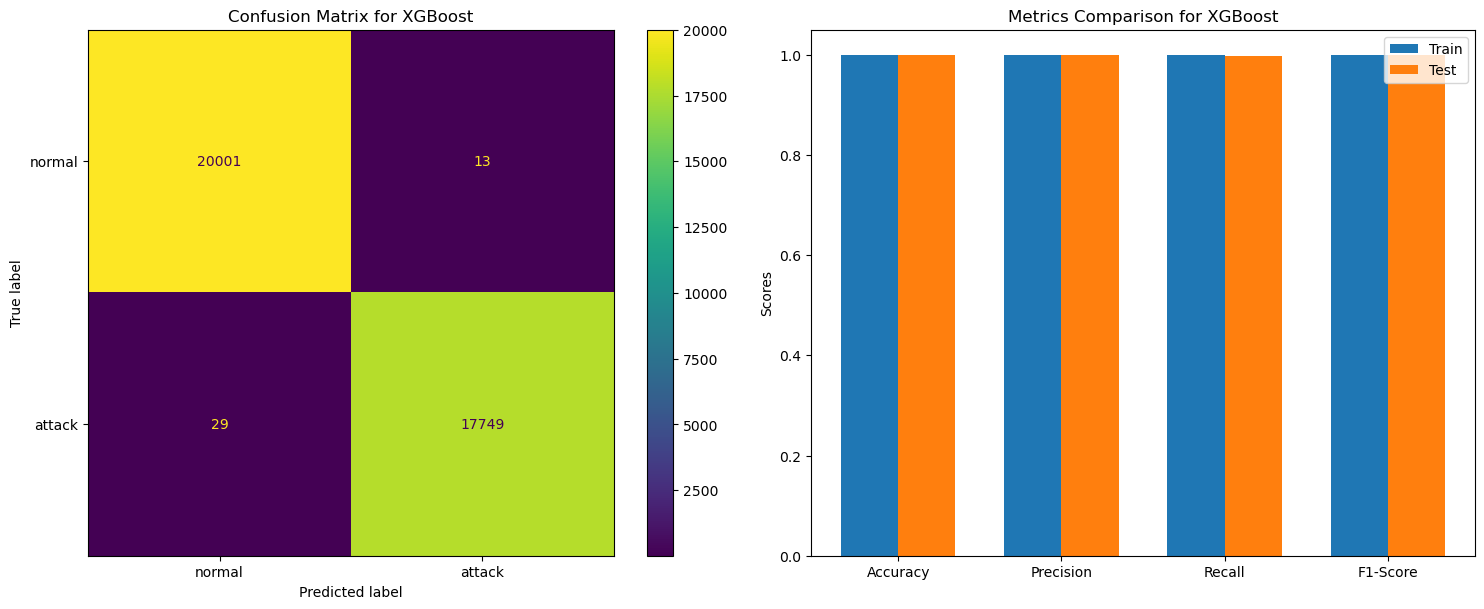

In [26]:

# Train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=500, random_state=50)
xgb_classifier.fit(x_train_reduced, y_train_reduced)

# Evaluate the XGBoost classifier
evaluate_classification(xgb_classifier, "XGBoost", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# 

# DECISION TREE 
<img src="https://addepto.com/wp-content/uploads/2020/04/Zrzut-ekranu-2020-04-28-o-14.18.08.png" width=500, height=500>

Training Accuracy DecisionTreeClassifier: 99.99%
Test Accuracy DecisionTreeClassifier: 99.70%
Training Precision DecisionTreeClassifier: 100.00%
Test Precision DecisionTreeClassifier: 99.68%
Training Recall DecisionTreeClassifier: 99.99%
Test Recall DecisionTreeClassifier: 99.67%
Training F1-Score DecisionTreeClassifier: 99.99%
Test F1-Score DecisionTreeClassifier: 99.68%


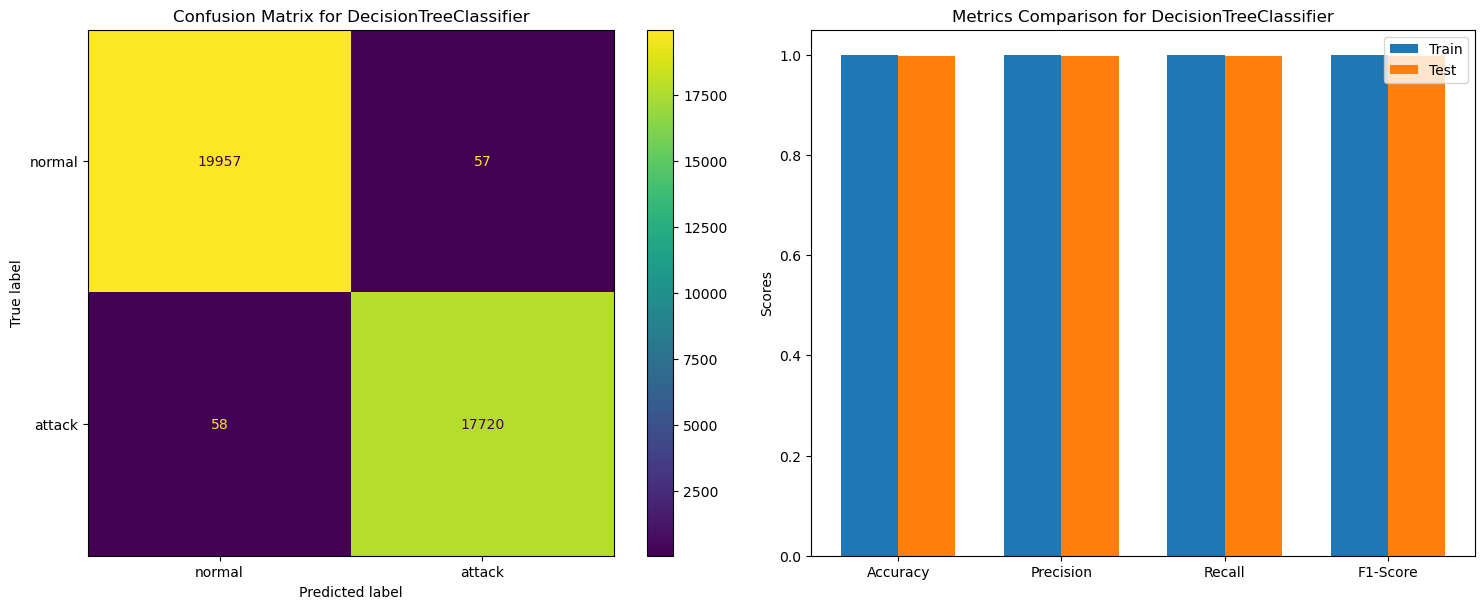

In [27]:


dt = DecisionTreeClassifier(max_depth=10).fit(x_train_reduced, y_train_reduced)
tdt = DecisionTreeClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)


# 

# Random Forest 
<img src="https://phuongphapnghiencuu.com/wp-content/uploads/2020/10/8-types-of-regression8.png" width=500, height=500>

Training Accuracy Random Forest: 99.99%
Test Accuracy Random Forest: 99.85%
Training Precision Random Forest: 99.99%
Test Precision Random Forest: 99.92%
Training Recall Random Forest: 100.00%
Test Recall Random Forest: 99.77%
Training F1-Score Random Forest: 99.99%
Test F1-Score Random Forest: 99.85%


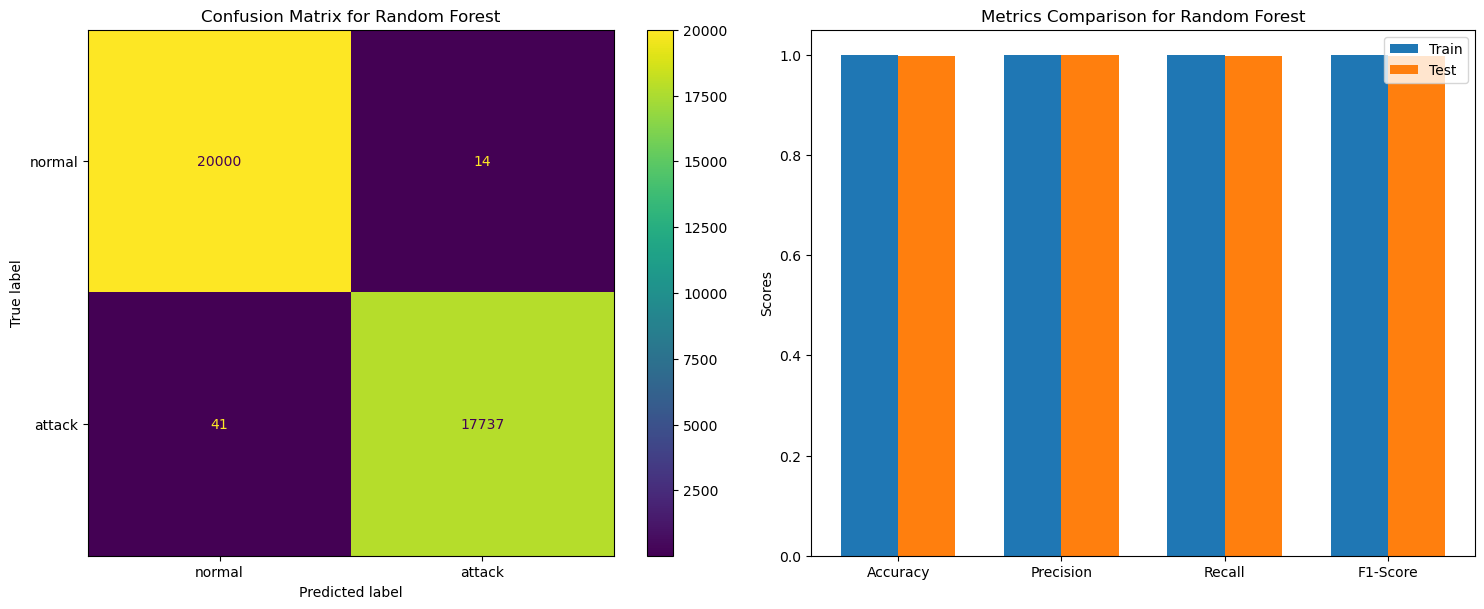

In [28]:
Rf = RandomForestClassifier(n_estimators = 200)  
tdt = Rf.fit(x_train_reduced, y_train_reduced)
evaluate_classification(tdt, "Random Forest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

#

# TRAINING AND PREDICTION ON ACTUAL 122 FEATURES

#

# LOGISTIC REGRESSION
<img src="https://th.bing.com/th/id/R.3e80078502bd23a659ca1ff4d7876cce?rik=g5JFf8Vzf7f%2fjw&pid=ImgRaw&r=0" width=500, height=500>

Training Accuracy Logistic Regression: 88.98%
Test Accuracy Logistic Regression: 88.72%
Training Precision Logistic Regression: 87.64%
Test Precision Logistic Regression: 87.61%
Training Recall Logistic Regression: 88.74%
Test Recall Logistic Regression: 88.53%
Training F1-Score Logistic Regression: 88.19%
Test F1-Score Logistic Regression: 88.07%


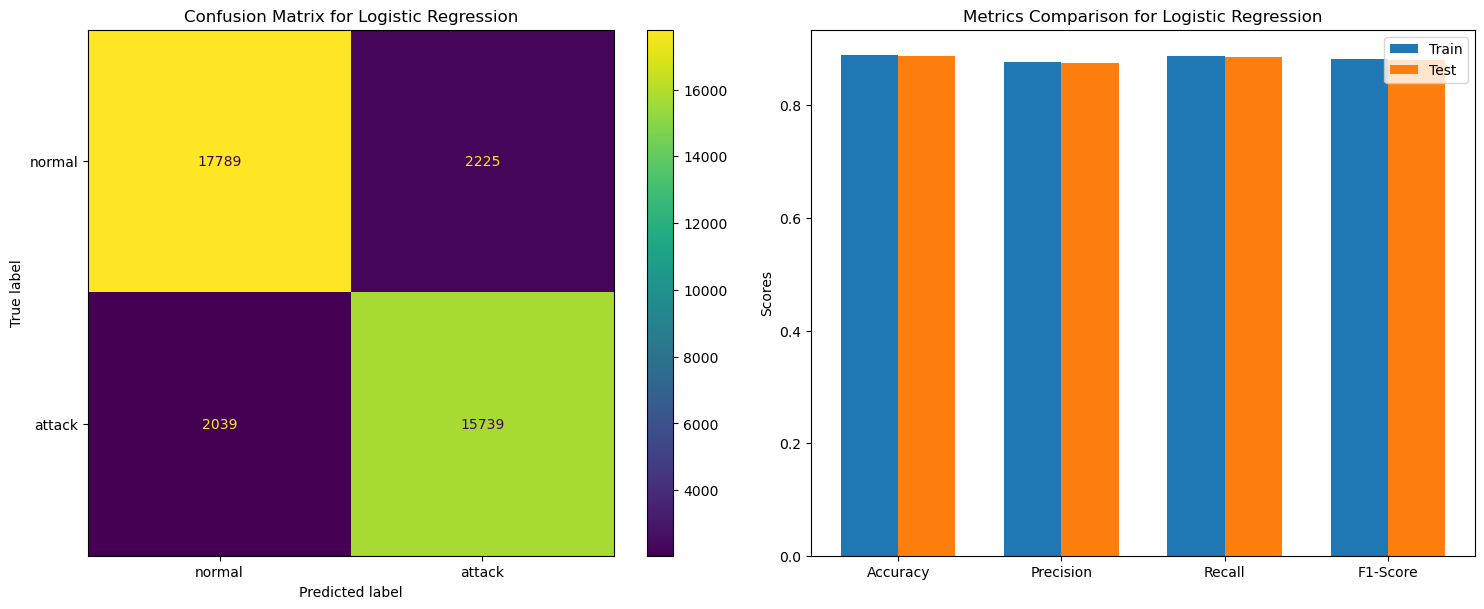

In [29]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

#

# XGB CLASSIFIER
<img src="https://th.bing.com/th/id/R.b8630edc224d36b0f5c8f95dc40814ef?rik=o9QhyoWsphclNQ&pid=ImgRaw&r=0&sres=1&sresct=1" width=500 hieght=500>

Training Accuracy XGBoost: 99.99%
Test Accuracy XGBoost: 99.91%
Training Precision XGBoost: 99.99%
Test Precision XGBoost: 99.95%
Training Recall XGBoost: 100.00%
Test Recall XGBoost: 99.85%
Training F1-Score XGBoost: 99.99%
Test F1-Score XGBoost: 99.90%


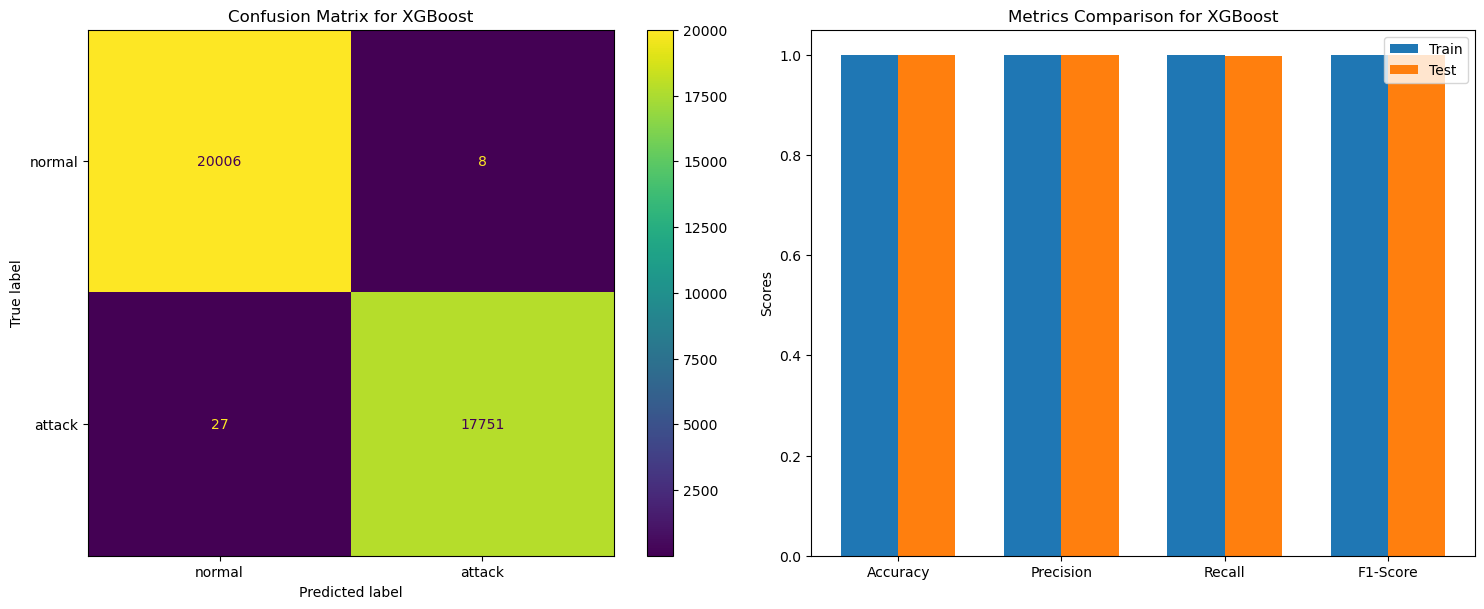

In [30]:
# Train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=500, random_state=50)
xgb_classifier.fit(x_train, y_train)

# Evaluate the XGBoost classifier
evaluate_classification(xgb_classifier, "XGBoost", x_train, x_test, y_train, y_test)

# 

# Decision Tree 
<img src="https://addepto.com/wp-content/uploads/2020/04/Zrzut-ekranu-2020-04-28-o-14.18.08.png" width=500, height=500>

Training Accuracy DecisionTreeClassifier: 99.99%
Test Accuracy DecisionTreeClassifier: 99.83%
Training Precision DecisionTreeClassifier: 100.00%
Test Precision DecisionTreeClassifier: 99.80%
Training Recall DecisionTreeClassifier: 99.99%
Test Recall DecisionTreeClassifier: 99.83%
Training F1-Score DecisionTreeClassifier: 99.99%
Test F1-Score DecisionTreeClassifier: 99.81%


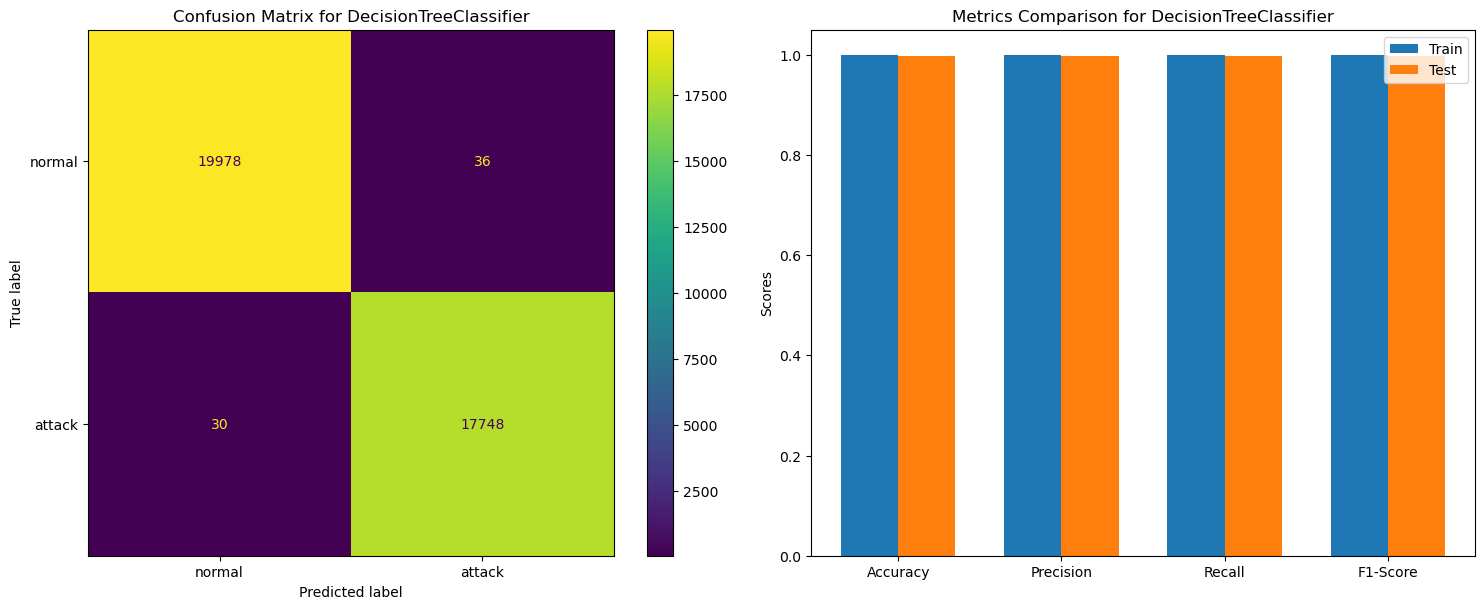

In [31]:
dt = DecisionTreeClassifier(max_depth=10).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

# 

# Random Forest 
<img src="https://phuongphapnghiencuu.com/wp-content/uploads/2020/10/8-types-of-regression8.png" width=500, height=500>

Training Accuracy Random Forest: 99.99%
Test Accuracy Random Forest: 99.89%
Training Precision Random Forest: 99.99%
Test Precision Random Forest: 99.95%
Training Recall Random Forest: 100.00%
Test Recall Random Forest: 99.81%
Training F1-Score Random Forest: 99.99%
Test F1-Score Random Forest: 99.88%


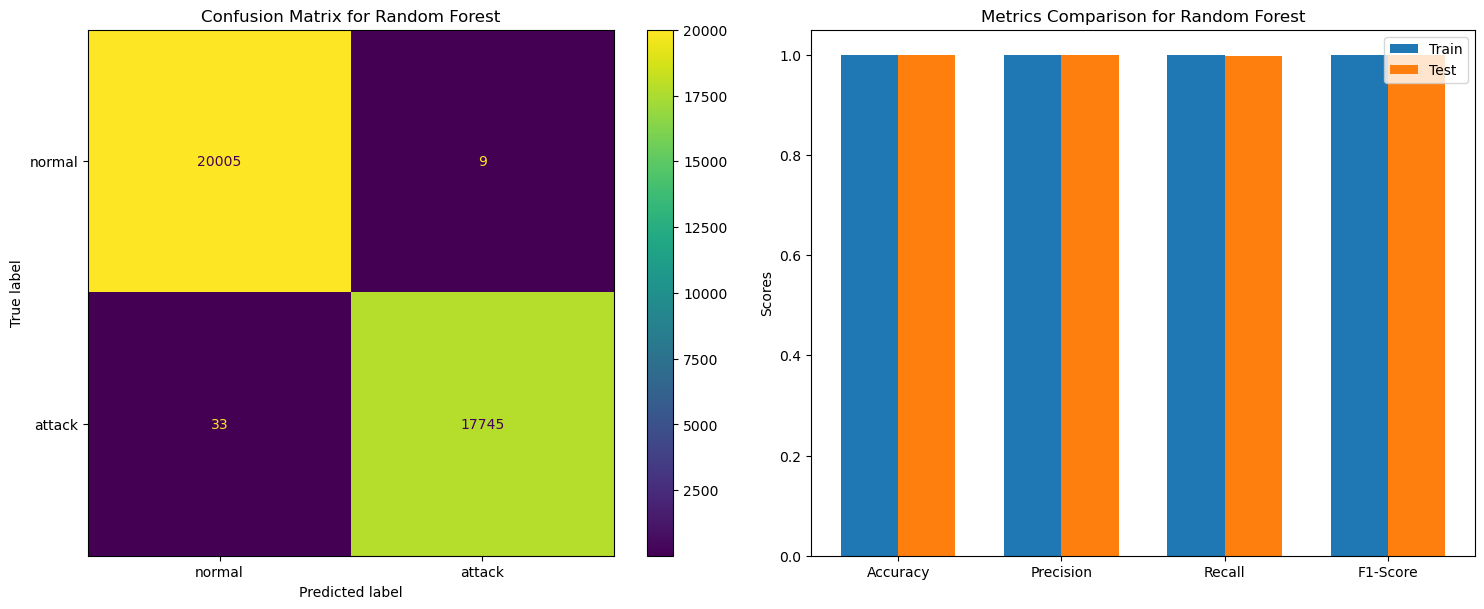

In [32]:
Rf = RandomForestClassifier(n_estimators = 200)  
tdt = Rf.fit(x_train, y_train)
evaluate_classification(tdt, "Random Forest", x_train, x_test, y_train, y_test)

<h1>Packet Capturing and Analysis:</h1></br>  <h3>The code defines a function to capture network packets using the scapy library. It extracts relevant fields from IP, TCP, UDP, and ICMP packets. The extracted values are stored in a dictionary.</h3>


In [33]:

from scapy.all import *
import time
import random
import threading
l = [0,1]
extracted_values_dict = {}
lock = threading.Lock()

def extract_values(packet, column_names):
    extracted_values = {}
    for column in column_names:
        if column in packet:
            value = packet[column]
            extracted_values[column] = value
        else:
            extracted_values[column] = random.choice(l)
    return extracted_values


def packet_callback(packet, column_names):
    
    if IP in packet:
        src_ip = packet[IP].src
        dst_ip = packet[IP].dst
        protocol = packet[IP].proto

        print(f"Source IP: {src_ip}, Destination IP: {dst_ip}, Protocol: {protocol}")

        if TCP in packet:
            src_port = packet[TCP].sport
            dst_port = packet[TCP].dport
            flags = packet[TCP].flags
            seq_number = packet[TCP].seq
            ack_number = packet[TCP].ack
            window_size = packet[TCP].window

            print(f"Source Port: {src_port}, Destination Port: {dst_port}, Flags: {flags}")
            print(f"Sequence Number: {seq_number}, Acknowledgment Number: {ack_number}")
            print(f"Window Size: {window_size}")

        if UDP in packet:
            src_port = packet[UDP].sport
            dst_port = packet[UDP].dport
            length = len(packet[UDP])

            print(f"Source Port: {src_port}, Destination Port: {dst_port}, Length: {length}")

        if ICMP in packet:
            icmp_type = packet[ICMP].type
            icmp_code = packet[ICMP].code

            print(f"ICMP Type: {icmp_type}, ICMP Code: {icmp_code}")

        # Extract more fields as needed
        global extracted_values_dict
        with lock:
            extracted_values = extract_values(packet, column_names)
            extracted_values_dict = extracted_values 


def capture_packets(interface, column_names):
    sniff(iface=interface, prn=lambda pkt: packet_callback(pkt, column_names), store=0)

interface = "Wi-Fi"  # Replace with your Wi-Fi interface
column_names = ['land', 'logged_in', 'is_host_login', 'level', 'duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc', 'service_supdup', 'service_systat', 'service_telnet', 'service_tftp_u', 'service_tim_i', 'service_time', 'service_urh_i', 'service_urp_i', 'service_uucp', 'service_uucp_path', 'service_vmnet', 'service_whois', 'flag_OTH', 'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'] # Your list of column names

# Start capturing packets in a separate thread

packet_capture_thread = threading.Thread(target=lambda: sniff(iface=interface, prn=lambda pkt: packet_callback(pkt, column_names), count=1, store=0))
packet_capture_thread.start()

    # Add a delay to allow time for packet capturing and processing
time.sleep(10)  # Adjust the delay time as needed

    # Print the extracted values dictionary
with lock:
    print(f"The Dictionary: {extracted_values_dict}")

The Dictionary: {}


<h1>Autoencoder and Predictive Modeling:</h1></br>  <h3>The code implements an autoencoder neural network that compresses and reconstructs the input data. The encoder part of the autoencoder is then used to transform the input data. The encoded data is used to train an XGBoost classifier for anomaly detection.</h3>

<img src="https://th.bing.com/th/id/OIP.1dBWiKSagk4sA38Ok-s9lQHaFf?pid=ImgDet&rs=1" width=500 height=500>

Epoch 1/5
2756/2756 [==============================] - 14s 4ms/step - loss: 3569427.5000 - val_loss: 5879294.0000
Epoch 2/5
2756/2756 [==============================] - 11s 4ms/step - loss: 3569425.5000 - val_loss: 5879294.0000
Epoch 3/5
2756/2756 [==============================] - 11s 4ms/step - loss: 3569427.5000 - val_loss: 5879294.0000
Epoch 4/5
2756/2756 [==============================] - 11s 4ms/step - loss: 3569423.0000 - val_loss: 5879294.0000
Epoch 5/5
1181/1181 [==============================] - 3s 2ms/step
Training and evaluating Logistic Regression
Training Accuracy Logistic Regression: 94.57%
Test Accuracy Logistic Regression: 94.15%
Training Precision Logistic Regression: 92.53%
Test Precision Logistic Regression: 91.96%
Training Recall Logistic Regression: 96.04%
Test Recall Logistic Regression: 95.96%
Training F1-Score Logistic Regression: 94.25%
Test F1-Score Logistic Regression: 93.92%


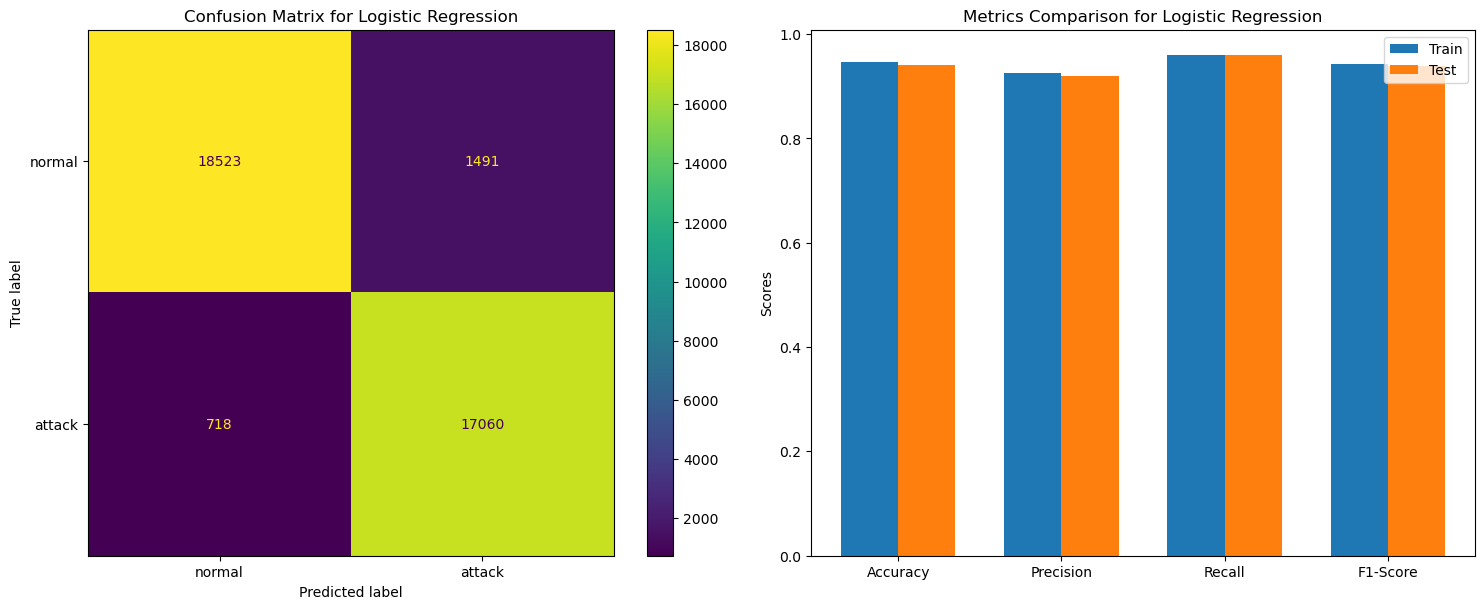

Training and evaluating Decision Tree
Training Accuracy Decision Tree: 99.99%
Test Accuracy Decision Tree: 99.35%
Training Precision Decision Tree: 100.00%
Test Precision Decision Tree: 99.34%
Training Recall Decision Tree: 99.99%
Test Recall Decision Tree: 99.28%
Training F1-Score Decision Tree: 99.99%
Test F1-Score Decision Tree: 99.31%


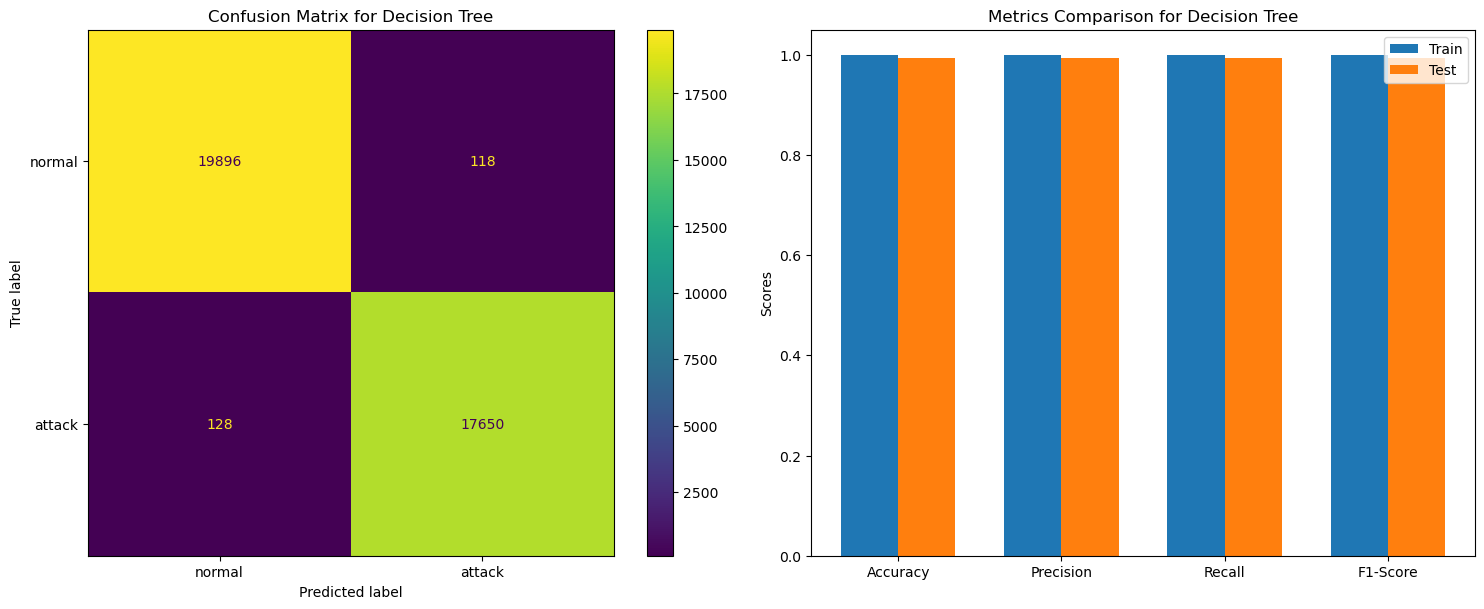

Training and evaluating XGB Classifier
Training Accuracy XGB Classifier: 99.99%
Test Accuracy XGB Classifier: 99.63%
Training Precision XGB Classifier: 100.00%
Test Precision XGB Classifier: 99.67%
Training Recall XGB Classifier: 99.98%
Test Recall XGB Classifier: 99.55%
Training F1-Score XGB Classifier: 99.99%
Test F1-Score XGB Classifier: 99.61%


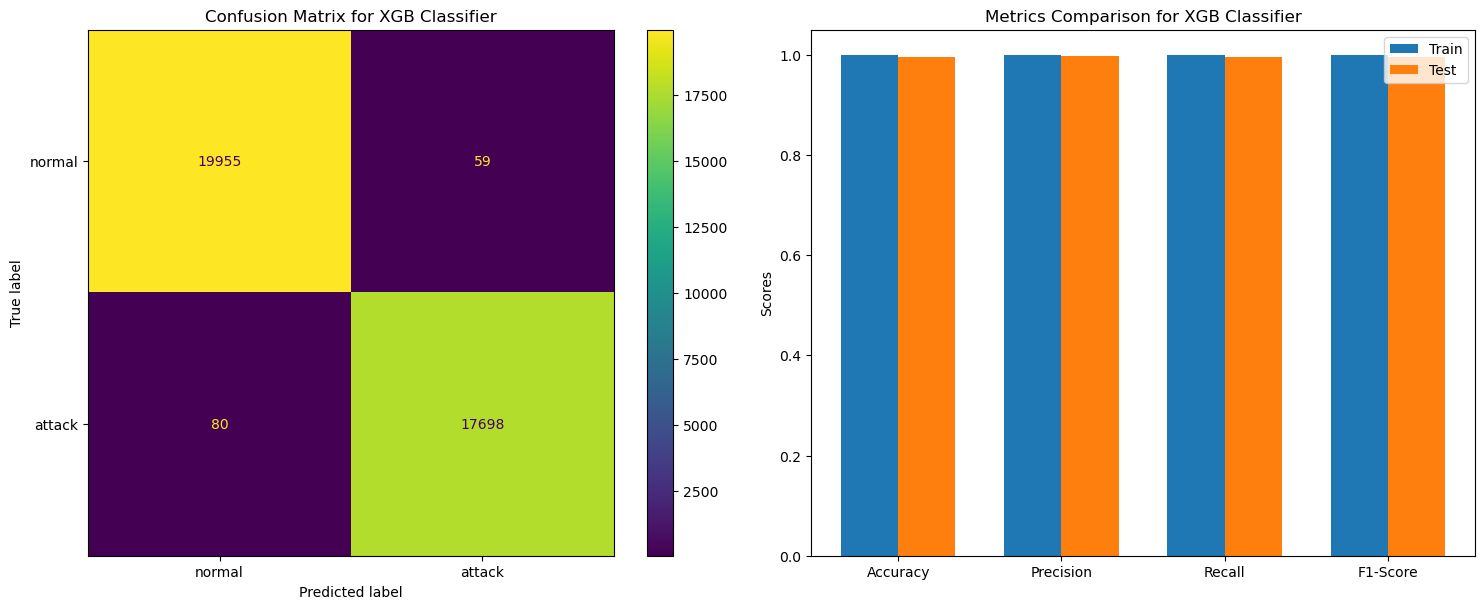

Training and evaluating Random Forest
Training Accuracy Random Forest: 99.99%
Test Accuracy Random Forest: 99.64%
Training Precision Random Forest: 100.00%
Test Precision Random Forest: 99.73%
Training Recall Random Forest: 99.99%
Test Recall Random Forest: 99.50%
Training F1-Score Random Forest: 99.99%
Test F1-Score Random Forest: 99.61%


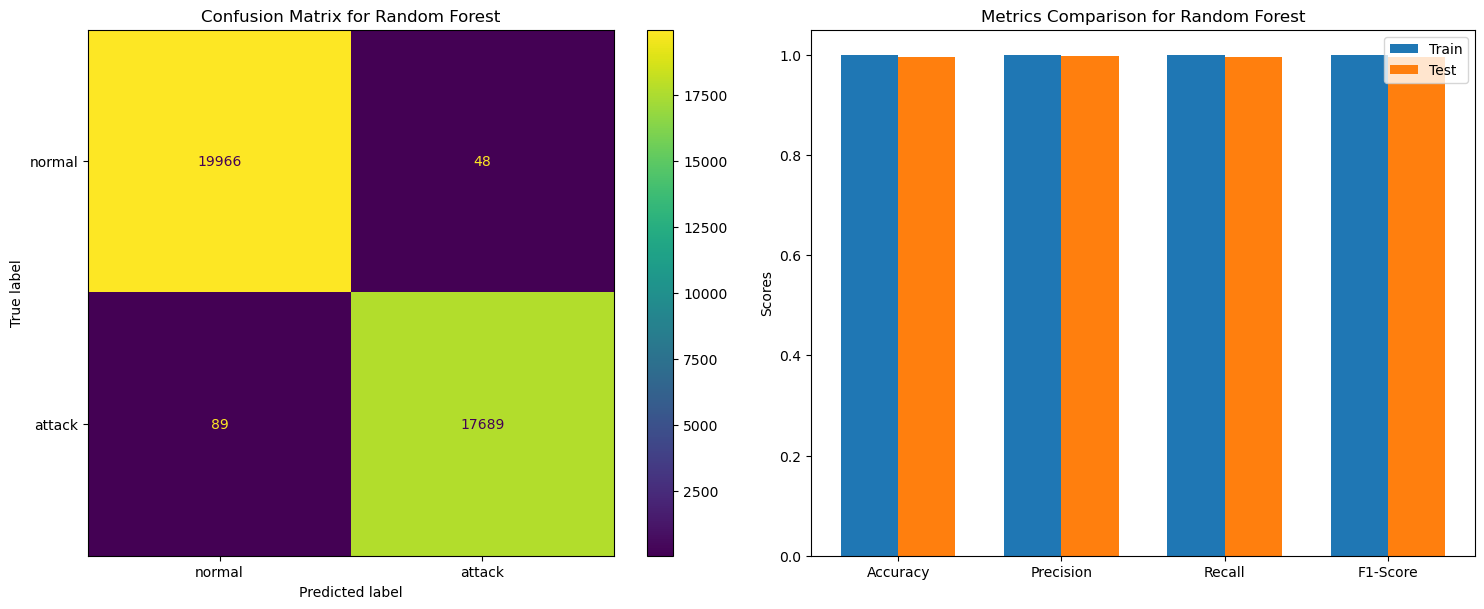

In [34]:

import warnings
from tensorflow.keras.layers import Input, Dense  # Add this import
from tensorflow.keras.models import Model  # Add this import
from sklearn.exceptions import NotFittedError

# ... (previous code)
input_data = {'land': 1, 'logged_in': 0, 'is_host_login': 1, 'is_guest_login': 0, 'duration': 1, 'src_bytes': 0, 'dst_bytes': 0, 'wrong_fragment': 0,
              'urgent': 0, 'hot': 1, 'num_failed_logins': 0, 'num_compromised': 0, 'root_shell': 0, 'su_attempted': 0, 'num_root': 1, 'num_file_creations': 1, 
              'num_shells': 1, 'num_access_files': 1, 'num_outbound_cmds': 0, 'count': 1, 'srv_count': 1, 'serror_rate': 0, 'srv_serror_rate': 0, 'rerror_rate': 1, 
              'srv_rerror_rate': 0, 'same_srv_rate': 1, 'diff_srv_rate': 1, 'srv_diff_host_rate': 0, 'dst_host_count': 0, 'dst_host_srv_count': 0, 'dst_host_same_srv_rate': 1, 
              'dst_host_diff_srv_rate': 0, 'dst_host_same_src_port_rate': 0, 'dst_host_srv_diff_host_rate': 0, 'dst_host_serror_rate': 0, 'dst_host_srv_serror_rate': 1, 
              'dst_host_rerror_rate': 0, 'dst_host_srv_rerror_rate': 1, 'protocol_type_icmp': 0, 'protocol_type_tcp': 1, 'protocol_type_udp': 1, 'service_IRC': 1,
              'service_X11': 0, 'service_Z39_50': 0, 'service_aol': 1, 'service_auth': 1, 'service_bgp': 0, 'service_courier': 1, 'service_csnet_ns': 0, 'service_ctf': 0, 
              'service_daytime': 1, 'service_discard': 1, 'service_domain': 0, 'service_domain_u': 1, 'service_echo': 1, 'service_eco_i': 0, 'service_ecr_i': 0, 
              'service_efs': 1, 'service_exec': 1, 'service_finger': 1, 'service_ftp': 1, 'service_ftp_data': 0, 'service_gopher': 1, 'service_harvest': 0, 'service_hostnames': 1, 
              'service_http': 1, 'service_http_2784': 1, 'service_http_443': 0, 'service_http_8001': 1, 'service_imap4': 0, 'service_iso_tsap': 1, 'service_klogin': 1, 
              'service_kshell': 0, 'service_ldap': 0, 'service_link': 1, 'service_login': 0, 'service_mtp': 1, 'service_name': 1, 'service_netbios_dgm': 1, 'service_netbios_ns': 1,
              'service_netbios_ssn': 1, 'service_netstat': 1, 'service_nnsp': 1, 'service_nntp': 1, 'service_ntp_u': 0, 'service_other': 1, 'service_pm_dump': 1, 
              'service_pop_2': 0, 'service_pop_3': 1, 'service_printer': 0, 'service_private': 0, 'service_red_i': 1, 'service_remote_job': 1, 'service_rje': 1, 
              'service_shell': 1, 'service_smtp': 0, 'service_sql_net': 0, 'service_ssh': 1, 'service_sunrpc': 1, 'service_supdup': 0, 'service_systat': 0, 'service_telnet': 1, 
              'service_tftp_u': 1, 'service_tim_i': 1, 'service_time': 0, 'service_urh_i': 0, 'service_urp_i': 1, 'service_uucp': 0, 'service_uucp_path': 1, 'service_vmnet': 1, 
              'service_whois': 0, 'flag_OTH': 1, 
              'flag_REJ': 1, 'flag_RSTO': 0, 'flag_RSTOS0': 1, 'flag_RSTR': 0, 'flag_S0': 1, 'flag_S1': 1, 'flag_S2': 0, 'flag_S3': 1, 'flag_SF': 0, 'flag_SH': 1}

    # Convert the values of the dictionary in the specified order
input_list2 = []
for value in input_data.values():
    input_list2.append(value)
input_list2 = np.array(input_list2)

# Autoencoder model
input_dim = x_train.shape[1]
encoding_dim = 15

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(x_train, x_train, epochs=5, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

# Create separate encoder model
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Encode data using the trained encoder
encoded_x_train = encoder_model.predict(x_train)
encoded_x_test = encoder_model.predict(x_test)

# Train and evaluate classifiers using encoded data
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGB Classifier': xgb.XGBClassifier(objective='binary:logistic', n_estimators=200, random_state=50),
    'Random Forest' : RandomForestClassifier(n_estimators = 200)  
}

for model_name, model in models.items():
    print(f"Training and evaluating {model_name}")
    model.fit(encoded_x_train, y_train)
    evaluate_classification(model, model_name, encoded_x_train, encoded_x_test, y_train, y_test)




<h1>Real-time Prediction: </h1> <br> <h3>The code enters an infinite loop where it simulates receiving network packet data in real-time (you can replace this with actual live data). The received packet data is processed, encoded using the autoencoder, and then fed to the trained XGBoost classifier for anomaly prediction. Depending on the prediction outcome, a message is displayed indicating whether the packet is predicted to be normal or an attack.</h3>

1/1 [==============================] - 0s 135ms/step
Predicted Outcome: Normal


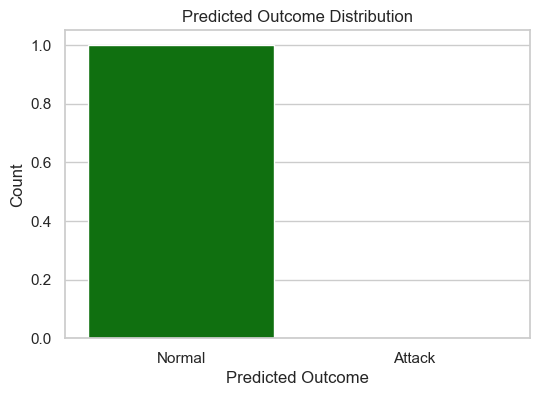

In [35]:
xgb_classifier.fit(encoded_x_train, y_train)

# Now, let's use the trained autoencoder to predict whether an input is normal or attack
input_example = input_list2  # You can replace this with any input you want to test
encoded_input = encoder_model.predict(np.array([input_example]))  # Encode the input

# Predict the outcome using the trained classifier
predicted_outcome = xgb_classifier.predict(encoded_input)

if predicted_outcome[0] == 0:
    print("Predicted Outcome: Normal")
else:
    print("Predicted Outcome: Attack")
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
outcome_values = ['Normal', 'Attack']
outcome_counts = [1 - predicted_outcome[0], predicted_outcome[0]]
sns.barplot(x=outcome_values, y=outcome_counts, palette=['green', 'red'])
plt.title("Predicted Outcome Distribution")
plt.xlabel("Predicted Outcome")
plt.ylabel("Count")
plt.show()